## Monte Carlo simulation

**Historia**

La simulación de Monte Carlo fue desarrollada por primera vez por Stanislaw Ulam en la década de 1940. Ulam era un matemático que trabajó en el Proyecto Manhattan. Inicialmente, el método se obtuvo para resolver el problema de determinar la distancia promedio que los neutrones viajarían a través de varios materiales. El método lleva el nombre del Casino de Montecarlo en Mónaco ya que la aleatoriedad de los resultados que es crucial para juegos como la ruleta o los dados es esencial para las simulaciones de Montecarlo.[Ref](https://corporatefinanceinstitute.com/resources/knowledge/modeling/monte-carlo-simulation/)

**Ejercicio** https://www.youtube.com/watch?v=OgO1gpXSUzU

**Definiciones**

Es una técnica probabilística para diseñar experimentos o simulaciones con el fin de estudiar la distribución de probabilidad no determinista de los factores y las respuestas. [Ref](https://www.sciencedirect.com/topics/chemistry/monte-carlo-method)

Son una amplia clase de algoritmos computacionales que se basan en muestreo aleatorio que se repite un número de veces, para obtener resultados numéricos. El concepto subyacente es utilizar la aleatoriedad para resolver problemas que pueden ser deterministas en principio [Ref](https://en.wikipedia.org/wiki/Monte_Carlo_method). La ley de grandes números asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras y el teorema del límite central, proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras. 

### Números aleatorios y Monte-Carlo [Ref](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/MCpy.ipynb)

El término **Monte Carlo** realmente proviene de la aleatoriedad inherente al método. Fue inventado por Metrópolis y popularizado por los pioneros en el campo: Metrópolis, Ulam, Fermi, von Neumann, en los años 40-50.

El uso más común para los métodos de Monte Carlo es la evaluación de integrales. Esta es también la base de las simulaciones de Monte Carlo (que en realidad son integraciones). Los principios básicos son válidos en ambos casos.


Los números aleatorios son el centro de los Métodos de Monte-Carlo y gracias a lenguajes como Python, se tienen funciones generadoras de números aleatorios(un procedimiento que produce un flujo infinito de variables aleatorias, que generalmente se encuentran en el intervalo (0, 1); los cuales son independientes y están uniformemente distribuidos de acuerdo a una distribución de probabilidad)

### Números pseudoaleatorios

Se habla de números *pseudoaleatorios* , como una secuencia de números con propiedades estadísticas que son indistinguibles de las de una verdadera secuencia de variables aleatorias.

In [4]:
import random

random.seed(1980) # semilla para replicar la aleatoriedad
random.random() 

0.009563936586945543

In [5]:
# seed para replicar el mismo resultado aleatorio.
random.seed(1980) 
for i in range(7):
    print(random.random()) 

0.009563936586945543
0.3791338466389689
0.6551606797443539
0.43645792505213843
0.898460761692238
0.42082263507341333
0.5357507103880063


### Aproximación de Pi

Si se inscribe un círculo de radio R dentro de un cuadrado con longitud lateral 2R, entonces el área del círculo será pi * R ^ 2 y el área del cuadrado será (2R) ^ 2. Entonces, la razón del área del círculo al área del cuadrado será pi / 4.

Esto significa que, si elige N puntos al azar dentro del cuadrado, aproximadamente N * pi / 4 de esos puntos deberían caer dentro del círculo.

Este programa selecciona puntos al azar dentro del cuadrado. Luego verifica si el punto está dentro del círculo (sabe que está dentro del círculo si x ^ 2 + y ^ 2 <R ^ 2, donde x e y son las coordenadas del punto y R es el radio del círculo ) El programa realiza un seguimiento de cuántos puntos se seleccionó hasta ahora (N) y cuántos de esos puntos cayeron dentro del círculo (M).

Pi se aproxima entonces de la siguiente manera:

      
$$ \pi = \frac{M * 4}{N}  $$ 


Aunque el Método Monte Carlo a menudo es útil para resolver problemas en física y matemáticas que no pueden resolverse por medios analíticos, es un método bastante lento para calcular pi.

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy import stats

np.random.seed(1980) 

%matplotlib inline

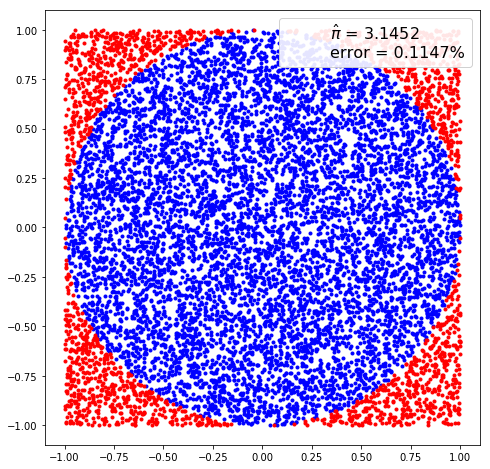

In [7]:
## Tomado de https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/MCpy.ipynb
# Ejemplo: Aproximando el valor de pi - área de un círculo de radio = 1.
#http://www.eveandersson.com/pi/monte-carlo-circle
def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

### Aproximación de una integral

Imagine que queremos medir el área de un estanque con forma arbitraria. Suponga que este estanque está en el medio de un campo con área conocida $ A $. 

Si arrojamos piedras $ N $ al azar, de modo que caigan dentro del
límites del campo, y contamos el número de piedras que caen en
el estanque $ N_ {in} $, el área del estanque será aproximadamente
proporcional a la fracción de piedras que salpican, multiplicado por
$A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ Este sencillo procedimiento es un ejemplo
del método "Monte Carlo".

**Integración usando Monte Carlo** [Ref](https://towardsdatascience.com/monte-carlo-simulations-with-python-part-1-f5627b7d60b0)

<img src = "../imgs/integral.png" width = '300'>

Imagine un rectángulo de altura $H$ en el intervalo de integración $[a,b]$, tal que la función $f(x)$ está dentro de sus límites. Calcule $n$ pares de números aleatorios $(x_i,y_i)$ tal que estén distribuidos uniformemente dentro de ese rectángulo. La fracción de puntos que caen dentro del área contenida debajo de $f(x)$, <span>*i.
e.*</span>, que satisface $y_i \leq f(x_i)$ es una estimación de la razón
fthe integral de $f(x)$ y el área del rectángulo.  Por lo tanto, la estimación de la integral estará dada por:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).
$$

Otro procedimiento de Monte Carlo se basa en la definición:
$$\langle g \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.
$$ En orden para determinar este promedio, tomamos muestras del valor de
 $f(x)$:
$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ donde los
$N$ valores $x_i$ están distribuidos uniformemente en el intervalo $[a,b]$. De allí que la integral estará dada por  $$I(N)=(b-a) \langle f \rangle .$$

In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

PI = 3.1415926
e = 2.71828

In [3]:
# Función para generar números aleatorios entre un rango 
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    drange = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + drange*choice

In [5]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    func = #YOUR CODE HEAR
    return func

In [6]:
## Implementación
##1. Obtenga un valor de entrada aleatorio en el rango de integración
##2. Evaluar el integrando
##3. Repita los pasos 1 y 2 todo el tiempo que desee.
##4. Determine el promedio de todas estas muestras y multiplíquelo por el rango

def crude_monte_carlo(num_samples=5000):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    lower_bound = 0
    upper_bound = 5
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = ##YOUR CODE HERE
        sum_of_samples += f_of_x(x)
    
    res = ##YOUR CODE HERE
    return res

In [7]:
samples = 10000
crude_estimation = crude_monte_carlo(samples)
print(f"Monte Carlo Approximation of f(x): {crude_estimation}")

Monte Carlo Approximation of f(x): 0.6940012894818309


### Análisis de errores en Monte Carlo

El método de Monte Carlo claramente arroja resultados aproximados. La precisión depende de la cantidad de valores $N$ que usamos para el promedio. Hasta ahora, hemos utilizado nuestro conocimiento del valor exacto de varias integrales para determinar que el error en el método Monte Carlo se aproxima a cero como aproximadamente $ 1 / \sqrt {N} $ para grandes $ N $, donde $ N $ es el número de intentos. A continuación, encontraremos cómo estimar el error cuando se desconoce la respuesta exacta. La dependencia de $ N $ del error es independiente de la naturaleza del integrando y, lo más importante, independiente del número de dimensiones.

Por tanto, una posible medida del error es la “varianza” $\sigma^2$ defina por:
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2,
$$ donde
$$\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i)$$ y
$$\langle f^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)^2.$$ La
“desviación estándar” es $\sigma$. Sin embargo, deberíamos esperar que el error decresca con el número de puntos $N$, y la cantidad  $\sigma$
definida por (\[mc\_sigma\]) no. De allí que no sea una buena medida del error.


Imagine que que realizamos varias mediciones de la integral, cada una de ellos dando un resultado $I_n$. Estos valores se han obtenido con diferentes secuencias de $N$ números aleatorios. Según el teorema del límite central, estos valores se distribuirían normalmente alrededor de una media $\langle I \rangle$. Suponga que tenemos un conjunto  $M$ de medidas  ${I_n}$. Una medida conveniente de las diferencias de estas medidas es la “desviación estándar de las medias” $\sigma_M$:
$$\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,
$$ donde
$$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$$ y
$$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$ 
Se puede demostrar que

$$ \sigma_M^2 \approx \frac{\sigma^2}{N} $$

donde 

$$ \sigma^2= \langle f^2 \rangle - \langle f \rangle ^2 $$

que es la varianza de la función 

Aunque $ \sigma_M $ nos da una estimación del error real, no es práctico realizar mediciones adicionales. En cambio, se puede demostrar que

$$ \sigma_M^2 \approx \frac{\langle f^2 \rangle - \langle f \rangle ^2 }{N} $$


Por tanto, en la integración de Monte Carlo usando $N$ samples, el error es
 
$$ \sigma_I =  \sqrt{\frac{\langle f^2\rangle- \langle f\rangle^2}{N}} .$$

Esta relación se vuelve exacta en el límite de un gran número de mediciones. Tenga en cuenta que esta expresión implica que el error disminuye con la raíz cuadrada del número de intentos, lo que significa que si queremos reducir el error en un factor 10, necesitamos 100 veces más puntos para el promedio.

In [8]:
def get_crude_MC_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = 5 # this is the max of our integration range
    
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = #YOUR CODE HERE
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = #YOUR CODE HERE
    
    return sum_of_sqs - sq_ave

In [11]:
var_samples = 10000 # number of samples we will use to calculate the variance
variance = get_crude_MC_variance(var_samples)
error = #YOUR CODE HERE
print(f"Variance of Approximation: {variance}")
print(f"Error in Approximation: {error}")

Variance of Approximation: 0.2635866201124503
Error in Approximation: 0.005134068757938973


Reducción de varianza
------------------

Si la función que se integra no fluctúa demasiado en el intervalo de integración, y no difiere mucho del valor promedio, entonces el método estándar de valor medio de Monte Carlo debería funcionar bien con un número razonable de puntos. De lo contrario, encontraremos que la varianza es muy grande, lo que significa que algunos puntos harán pequeñas contribuciones, mientras que otros harán grandes contribuciones a la integral. Si este es el caso, el algoritmo será muy ineficiente.
El método se puede mejorar dividiendo la función
 $f(x)$ en dos 
$f(x)=f_1(x)+f_2(x)$, tal que la integral de $f_1(x)$ es conocida, y
$f_2(x)$ tiene una pequeña varianza. La técnica de “reducción de varianza”,
consiste en evaluar la integral de $f_2(x)$ para obtener:
$$\int _a^b{f(x)dx}=\int _a^b {f_1(x)dx} + \int _a^b{f_2(x)dx} = \int
_a^b{f_1(x)dx}+J.$$


Para mayor información, consultar el [enlace](http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-4.html)

## Referencias
http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-3.html


### Monte Carlo Tree Search [Ref](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications)
Los métodos de Monte Carlo se han desarrollado en una técnica llamada búsqueda de árbol de Monte-Carlo que es útil para buscar el mejor movimiento en un juego. Los movimientos posibles se organizan en un árbol de búsqueda y se utilizan muchas simulaciones aleatorias para estimar el potencial a largo plazo de cada movimiento. 

Video [Ref](https://www.youtube.com/watch?v=Fbs4lnGLS8M)
Tutorial [Ref](https://www.analyticsvidhya.com/blog/2019/01/monte-carlo-tree-search-introduction-algorithm-deepmind-alphago/)
Implementación [Ref](https://github.com/int8/monte-carlo-tree-search)

## Generadores de números aleatorios

Aquí exploraremos cómo las computadoras generan números aleatorios.

Aleatoriedad significa falta de correlación. Para una secuencia de números $ r = {r_1, r_2, \ldots, r_n} $
podemos definir la aleatoriedad como una propiedad asintótica de la serie como $ N \rightarrow \infty $.
Dado que esta es una tarea desesperada, podemos probar la aleatoriedad con varias pruebas que se describen a continuación.

Se necesitan secuencias largas de números aleatorios en numerosas aplicaciones, en particular métodos que utilizan números aleatorios como técnicas de simulación de Monte Carlo, optimización estocástica, cálculos de criptografía que simulan procesos aleatorios naturales (por ejemplo, movimiento térmico o desintegración radiactiva). Todos estos métodos requieren fuentes de números aleatorios rápidas y confiables.

Muchos procesos físicos son aleatorios por naturaleza y tales procesos pueden usarse para producir números aleatorios. Ejemplos son el ruido en dispositivos semiconductores o lanzar un dado.
Por otro lado, las computadoras son máquinas deterministas y, por eso, no pueden generar números verdaderamente aleatorios.

En la práctica, los generadores de números pseudoaleatorios generan números aleatorios.
Estos son algoritmos deterministas y, en consecuencia, los números generados son solo "pseudoaleatorios" y tienen sus limitaciones.
Pero para muchas aplicaciones, los números pseudoaleatorios pueden usarse con éxito para aproximar números aleatorios reales.

Digamos que la probabilidad de que ocurra un número aleatorio es $ P (r) $ y eso significa que la probabilidad de encontrar $ r_i $ en el intervalo $ [r_j, r_j + dr] $ es $ P (r) dr $.
Una distribución uniforme significa que P (r) es constante y eso significa que todos los números tienen la misma probabilidad de ocurrir. No todas las secuencias aleatorias son uniformes. En otras distribuciones (Normal, Poisson, etc.) no todos los números tienen la misma probabilidad de ocurrir.

### Linear Congruential Generator
El generador congruencial lineal se basa en una relación recursiva entera.

$$ r_{i+1} = (a \, r_i +c) \, {\rm mod} \, M  $$

donde $ a, c $ y $ M $ son constantes. Esto genera una secuencia $ r_1, r_2, \ldots $ de enteros aleatorios que se distribuyen entre $ [0, M-1] $ (si $ c> 0 $) o entre $ [1, M] $ (si $ c = 0 $). Cada $ r_i $ se escala al intervalo $ (0,1) $ dividiéndolo entre $ M $. El parámetro $ M $ suele ser igual o casi igual al número entero más grande de la computadora. Esto determina el período $ P $ del generador y $ P <M $.
El primer número en la secuencia $ r_1 $ es una entrada y se llama **semilla**.

Si $ c \neq 0 $, el período del generador es igual a $ M $ si y solo si

+ $ c $ es relativamente primo a $ M $ (encuentra el máximo común divisor)
+ $ a-1 $ es un múltiplo de cada número primo que divide $ M $ y
+ $ a -1 $ es múltiplo de 4 si $ M $ es múltiplo de 4

Si $ M> 2 $ es un número primo,
+ el período máximo posible es $ M-1 $ y
+ el período máximo se alcanza si $ a \, \, {\rm mod} \, \, M \neq 0 $ y
  $ a ^ {M-1} / q \, \, {\rm mod} \, \, M \neq 1 $ por cada divisor primo $ q $ de $ M-1 $.

### Propiedades de números aleatorios
En la práctica, los algoritmos generadores de números aleatorios se implementan y ejecutan en un computador.

Los generadores de números aleatorios por computador producen una distribución uniforme de números en el rango $ [0,1] $. A continuación veremos cómo generar otras distribuciones a partir del uniforme.

Un generador de números aleatorios 'bueno' tiene las siguientes propiedades:

+ Los números deben tener la distribución correcta. Dado que la mayoría de los generadores de números aleatorios pretendían producir distribuciones uniformes, eso significa que la distribución debería ser uniforme.
+ El período de la secuencia debe ser más largo que los números necesarios para la aplicación. Todos los generadores de números aleatorios repetirán la misma secuencia de números eventualmente, pero es importante que la secuencia sea lo suficientemente larga.
+ La secuencia no está correlacionada.